#Capstone Project: EDA and Initial Report
**Overview**: In this project our goal is to create a model that can accurately predict the sale price of a car. As such we have selected a dataset that contains a significat amount of data about the car being sold. We will create 4 different models, LinearRegression, DecisionTree, RandomForest, and XGBoost.

**Data:**
Our dataset can be found [here](https://www.kaggle.com/datasets/imgowthamg/car-price/data) and contains data on categories such as wheelbase, weight, horsepower, and much more.

## Importing and Reading Data

In [373]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
import xgboost as XGBoost

warnings.filterwarnings('ignore')

In [374]:
train = pd.read_csv('train-data.csv')
test =  pd.read_csv('test-data.csv')

In [375]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [376]:
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


##Data Cleaning
This will contain all of our checks for missing values as well as duplicate values.

In [377]:
train.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


In [378]:
test.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,10


We have a few null values in our columns. We will have to decide what to do with these rows.

In [379]:
train.duplicated().sum()

0

In [380]:
test.duplicated().sum()

0

We have no duplicate values.

In [381]:
train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [382]:
test.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000,1223.000000
mean,616.500000,2013.400324,58507.288493,5.284546
std,356.369424,3.179700,35598.702098,0.825622
min,0.000000,1996.000000,1000.000000,2.000000
25%,308.250000,2011.000000,34000.000000,5.000000
50%,616.500000,2014.000000,54572.500000,5.000000
75%,924.750000,2016.000000,75000.000000,5.000000
max,1233.000000,2019.000000,350000.000000,10.000000


In [383]:
train.drop('New_Price', axis=1, inplace=True)
test.drop('New_Price', axis=1, inplace=True)

From this we see that we have about 83% training data and 17% test data. We also are missing a small amount of values in both our train and testing data. We should see what columns we need and drop the ones we dont.

###Unnamed: 0
This column seems to be the same as an id column and will not be useful for analysis, so we will drop it.

In [384]:
print(train.shape, test.shape)
train.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)
print(train.shape, test.shape)

(6019, 13) (1234, 12)
(6019, 12) (1234, 11)


###Name
This column contains the complete names of each vehicles make and model.

In [385]:
print(train['Name'].value_counts(),'\n-------------------------------------------')
print(test['Name'].value_counts())

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1876, dtype: int64 
-------------------------------------------
Name
Maruti Alto LXi                                         9
Honda City 1.5 V MT                                     8
Volkswagen Polo 1.2 MPI Highline                        8
Maruti Swift Dzire VDI                                  8
Audi A6 2011-2015 2.0 TDI Premium Plus                  7
                                                       ..
Hyundai Santro GLS I - Euro II                          1
Honda City i DTec VX Option BL                          1
Land Rover Discovery 4 SDV6 SE               

In [386]:
train_n = list(train['Name'].unique())
test_n = list(test['Name'].unique())
for i in test_n:
    if i not in train_n:
        print(i)

Toyota Innova Crysta Touring Sport 2.4 MT
Maruti Swift AMT ZXI
Skoda Laura 1.8 TSI Ambition
Honda Civic 2010-2013 1.8 S MT Inspire
Toyota Etios Liva 1.4 VXD
Maruti Celerio X VXI Option
Chevrolet Sail Hatchback 1.2
Mahindra Scorpio VLX Special Edition BS-IV
Tata Tiago AMT 1.2 Revotron XTA
Maruti Ciaz VXi
Nissan Teana XL
Tata Manza Club Class Safire90 LX
Ford Fiesta Classic 1.6 SXI Duratec
Mercedes-Benz B Class B180 Sports
Nissan Micra XL CVT
Tata Indica V2 DiCOR DLG BS-III
Tata Indica Vista Quadrajet LX
Audi Q3 30 TDI S Edition
Honda BRV i-DTEC V MT
BMW 3 Series GT 320d Sport Line
Toyota Etios Liva VD
Datsun GO T Petrol
Maruti A-Star Zxi
Mahindra KUV 100 mFALCON G80 K4 5str
Ford Fiesta 1.4 SXI Duratorq
Fiat Avventura FIRE Dynamic
Honda CR-V Diesel
Mahindra Xylo E9
Hyundai Creta 1.6 SX Automatic
Honda Mobilio V i VTEC
Tata Indica Vista Aqua TDI BSIII
Skoda Laura 1.9 TDI MT Elegance
Honda City ZX VTEC Plus
BMW 7 Series 730Ld DPE Signature
Hindustan Motors Contessa 2.0 DSL
Fiat Linea Dynam

We have a lot of names that are contained in our training dataset, but not our test dataset. As such we should drop this column as well.

In [387]:
print(train.shape, test.shape)
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
print(train.shape, test.shape)

(6019, 12) (1234, 11)
(6019, 11) (1234, 10)


###Location
This column contains all of the locations that each vehicle was sold in.

In [388]:
train['Location'].value_counts()


,count
Location,
Mumbai,790
Hyderabad,742
Kochi,651
Coimbatore,636
Pune,622
Delhi,554
Kolkata,535
Chennai,494
Jaipur,413


In [389]:
test['Location'].value_counts()

,count
Location,
Mumbai,159
Pune,143
Coimbatore,136
Hyderabad,134
Kochi,121
Kolkata,119
Delhi,106
Chennai,97
Jaipur,86


All loctaions are contained in both datasets, also from earlier, we know that this column has no missing values. As such we will be keeping the column.

###Kilometers_Driven
This column contains the milage of the vehicle at the time it was sold.

<Axes: ylabel='Kilometers_Driven'>

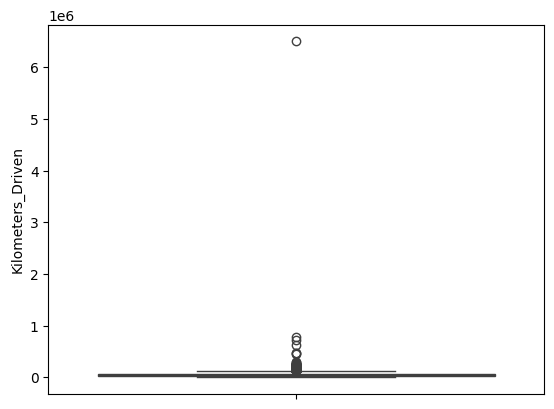

In [390]:
sns.boxplot(train['Kilometers_Driven'])

We see a lot of values below the 200,000km mark which is to be expected. We also see outlier values way above 600,000km. We will be dropping this value.

In [391]:
print(train.shape)
train.drop(train[train['Kilometers_Driven'] > 400000].index, axis=0, inplace=True)
print(train.shape)

(6019, 11)
(6012, 11)


###Fuel Type
This column contains the fuel type that the vehicle runs on.

In [392]:
train['Fuel_Type'].value_counts()

,count
Fuel_Type,
Diesel,3201
Petrol,2743
CNG,56
LPG,10
Electric,2


In [393]:
test['Fuel_Type'].value_counts()

,count
Fuel_Type,
Diesel,647
Petrol,579
CNG,6
LPG,2


Since our train data has evs and our test data does not, we will be dropping the rows with evs in them.

In [394]:
print(train.shape)
train.drop(train[train['Fuel_Type'] == 'Electric'].index, axis=0, inplace=True)
print(train.shape)

(6012, 11)
(6010, 11)


###Fuel Type
This column contains the transmission type that the vehicle has.

In [395]:
train['Transmission'].value_counts()

,count
Transmission,
Manual,4295
Automatic,1715


In [396]:
test['Transmission'].value_counts()

,count
Transmission,
Manual,905
Automatic,329


These values are fine and will likely impact the price of the vehicle so we will leave them as is.

###Fuel Type
This column contains the number of owners that the vehicle had before being sold.

In [397]:
train['Owner_Type'].value_counts()

,count
Owner_Type,
First,4920
Second,968
Third,113
Fourth & Above,9


In [398]:
test['Owner_Type'].value_counts()

,count
Owner_Type,
First,1023
Second,184
Third,24
Fourth & Above,3


These values are fine and will likely impact the price of the vehicle so we will leave them as is.

###Mileage
This column contains the fuel mileage the vehicle has.

In [399]:
train['Mileage'].value_counts(dropna=False)

,count
Mileage,
17.0 kmpl,172
18.9 kmpl,172
18.6 kmpl,119
20.36 kmpl,87
21.1 kmpl,86
...,...
27.28 kmpl,1
14.57 kmpl,1
22.8 km/kg,1


In [400]:
train['Mileage'] = train['Mileage'].fillna('17.0 kmpl')

###Engine
This column contains the engine displacement in CC.

In [401]:
train['Engine'].value_counts()

,count
Engine,
1197 CC,604
1248 CC,512
1498 CC,304
998 CC,259
2179 CC,240
...,...
1489 CC,1
1422 CC,1
1978 CC,1


In [402]:
test['Engine'].value_counts()

,count
Engine,
1197 CC,126
1248 CC,98
1498 CC,66
1198 CC,54
998 CC,50
...,...
1948 CC,1
1299 CC,1
5998 CC,1


In [403]:
train['Engine'] = train['Engine'].fillna('1197 CC')
test['Engine'] = test['Engine'].fillna('1197 CC')

Lets split the engine column into the numeric value of the displacement and drop the added cc measurement.

In [404]:
e_val = pd.DataFrame(columns=['Engine_value'])
e_measure = pd.DataFrame(columns=['Engine_measure'])
train = pd.concat([train, e_val, e_measure], axis=1)
test = pd.concat([test, e_val, e_measure], axis=1)

for i in train.index:
    value = train['Engine'][i].split()[0]
    measure = train['Engine'][i].split()[1]
    train['Engine_value'][i] = int(value)
    train['Engine_measure'][i] = measure

for i in test.index:
    value = test['Engine'][i].split()[0]
    measure = test['Engine'][i].split()[1]
    test['Engine_value'][i] = int(value)
    test['Engine_measure'][i] = measure

train.drop('Engine', axis=1, inplace=True)
test.drop('Engine', axis=1, inplace=True)

In [405]:
train.drop('Engine_measure', axis=1, inplace=True)
test.drop('Engine_measure', axis=1, inplace=True)

In [406]:
train['Engine_value'] = train['Engine_value'].astype(float)
test['Engine_value'] = test['Engine_value'].astype(float)

###Engine
This column contains the engine power in bhp.

In [407]:
train['Power'].value_counts()

,count
Power,
74 bhp,235
98.6 bhp,131
73.9 bhp,125
140 bhp,123
78.9 bhp,110
...,...
201 bhp,1
199.3 bhp,1
95 bhp,1


In [408]:
test['Power'].value_counts()

,count
Power,
74 bhp,45
98.6 bhp,35
73.9 bhp,27
82 bhp,23
null bhp,22
...,...
97.7 bhp,1
161 bhp,1
167.7 bhp,1


In [409]:
train['Power'] = train['Power'].replace('null bhp', '74 bhp')
test['Power'] = test['Power'].replace('null bhp', '74 bhp')
train['Power'] = train['Power'].fillna('74 bhp')
test['Power'] = test['Power'].fillna('74 bhp')

Lets split the power column into the numeric value of the power and drop the added bhp measurement.

In [410]:
p_val = pd.DataFrame(columns=['Power_value'])
p_measure = pd.DataFrame(columns=['Power_measure'])
train = pd.concat([train, p_val, p_measure], axis=1)
test = pd.concat([test, p_val, p_measure], axis=1)

for i in train.index:
    value = train['Power'][i].split()[0]
    measure = train['Power'][i].split()[1]
    train['Power_value'][i] = float(value)
    train['Power_measure'][i] = measure

for i in test.index:
    value = test['Power'][i].split()[0]
    measure = test['Power'][i].split()[1]
    test['Power_value'][i] = float(value)
    test['Power_measure'][i] = measure

train.drop('Power', axis=1, inplace=True)
test.drop('Power', axis=1, inplace=True)

In [411]:
train.drop('Power_measure', axis=1, inplace=True)
test.drop('Power_measure', axis=1, inplace=True)

In [412]:
train['Power_value'] = train['Power_value'].astype(float)
test['Power_value'] = test['Power_value'].astype(float)

###Engine
This column contains the number of seats the vehicle has.

In [413]:
train['Seats'].value_counts()

,count
Seats,
5.0,5005
7.0,674
8.0,134
4.0,99
6.0,31
2.0,16
10.0,5
9.0,3
0.0,1


In [414]:
test['Seats'].value_counts()

,count
Seats,
5.0,1033
7.0,122
8.0,36
4.0,20
6.0,7
10.0,3
2.0,2


In [415]:
train['Seats'] = train['Seats'].fillna(5.0)
test['Seats'] = test['Seats'].fillna(5.0)

##Feature Engineering

In [416]:
X = train.drop('Price', axis=1)
X_oe = train.drop('Price', axis=1)
y = train['Price']

In [417]:
num_cols = X.select_dtypes(include=['int','float']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print(num_cols)
print(cat_cols)

['Year', 'Kilometers_Driven', 'Seats', 'Engine_value', 'Power_value']
['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage']


In [418]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_cols), ('cat', OrdinalEncoder(), cat_cols)])
ode_enc = OrdinalEncoder()

In [419]:
X_txd = preprocessor.fit_transform(X)

In [420]:
X_txd

array([[-1.02668356e+00,  4.39893886e-01, -3.43580503e-01, ...,
         1.00000000e+00,  0.00000000e+00,  4.03000000e+02],
       [ 5.02073238e-01, -4.78000068e-01, -3.43580503e-01, ...,
         1.00000000e+00,  0.00000000e+00,  2.75000000e+02],
       [-7.20932197e-01, -3.29952656e-01, -3.43580503e-01, ...,
         1.00000000e+00,  0.00000000e+00,  2.32000000e+02],
       ...,
       [-4.15180838e-01, -6.34673145e-02,  3.37476072e+00, ...,
         1.00000000e+00,  2.00000000e+00,  9.10000000e+01],
       [-1.09429480e-01, -3.29952656e-01, -3.43580503e-01, ...,
         1.00000000e+00,  0.00000000e+00,  2.53000000e+02],
       [-7.20932197e-01, -3.00343173e-01, -3.43580503e-01, ...,
         1.00000000e+00,  0.00000000e+00,  3.91000000e+02]])

In [421]:
X_oe[cat_cols] = ode_enc.fit_transform(X_oe[cat_cols])

In [422]:
X_oe

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Engine_value,Power_value
0,9.0,2010,72000,0.0,1.0,0.0,403.0,5.0,998.0,58.16
1,10.0,2015,41000,1.0,1.0,0.0,275.0,5.0,1582.0,126.20
2,2.0,2011,46000,3.0,1.0,0.0,232.0,5.0,1199.0,88.70
3,2.0,2012,87000,1.0,1.0,0.0,308.0,7.0,1248.0,88.76
4,3.0,2013,40670,1.0,0.0,2.0,135.0,5.0,1968.0,140.80
...,...,...,...,...,...,...,...,...,...,...
6014,4.0,2014,27365,1.0,1.0,0.0,413.0,5.0,1248.0,74.00
6015,6.0,2015,100000,1.0,1.0,0.0,377.0,5.0,1120.0,71.00
6016,6.0,2012,55000,1.0,1.0,2.0,91.0,8.0,2498.0,112.00
6017,8.0,2013,46000,3.0,1.0,0.0,253.0,5.0,998.0,67.10


In [423]:
label_encoder = LabelEncoder()
y_txd = label_encoder.fit_transform(y)

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X_txd, y_txd, test_size=0.2, random_state=42)

In [426]:
X_train_oe, X_test_oe, y_train, y_test = train_test_split(X_oe, y_txd, test_size=0.2, random_state=42)

##Modeling

In [428]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr_train = lr.predict(X_train)

print("MSE on Training Set (Linear Regression):", mean_squared_error(y_pred_lr_train, y_train))
y_pred_lr_dev = lr.predict(X_test)
print("MSE on Dev Set (Linear Regression):", mean_squared_error(y_pred_lr_dev, y_test))

MSE on Training Set (Linear Regression): 19064.28987906776
MSE on Dev Set (Linear Regression): 19326.455834565386


In [429]:
dt = DecisionTreeRegressor(splitter='best', max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt_train = dt.predict(X_train)

print("MSE on Training Set (Decision Tree):", mean_squared_error(y_pred_dt_train, y_train))
y_pred_lr_dev = dt.predict(X_test)
print("MSE on Dev Set (Decision Tree):", mean_squared_error(y_pred_lr_dev, y_test))

MSE on Training Set (Decision Tree): 16807.325741327542
MSE on Dev Set (Decision Tree): 18300.701149890854


In [430]:
rf = RandomForestRegressor(n_estimators=20, max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf_train = rf.predict(X_train)

print("MSE on Training Set (Random Forest):", mean_squared_error(y_pred_rf_train, y_train))
y_pred_rf_dev = rf.predict(X_test)
print("MSE on Dev Set (Random Forest):", mean_squared_error(y_pred_rf_dev, y_test))

MSE on Training Set (Random Forest): 13475.200241788316
MSE on Dev Set (Random Forest): 14748.779279220647


In [ ]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    "criterion": ['squared_error', 'absolute_error'],
    "n_estimators": [5, 10, 15, 20, 25, 30],
    "max_depth": [5, 6, 7, 12, 13, 15]
}

rf_model = GridSearchCV(estimator=rf, cv=5, param_grid=param_grid)
rf_model.fit(X_txd, y_txd)
print(rf_model.best_score_)
print(rf_model.best_estimator_.get_params())

In [ ]:
xgb = XGBoost.XGBRegressor()

param_grid = {
    "booster": ['gbtree', 'dart'],
    "eta": [0.01, 0.06, 0.1, 0.7],
    "gamma": [0, 0.5, 1],
    "max_depth": [5, 8, 10, 13, 15],
    "lambda": [0, 1, 2],
    "alpha": [0, 1, 2]
}

xgb_model = GridSearchCV(estimator=xgb, cv=5, param_grid=param_grid, verbose=2)
xgb_model.fit(X_txd, y_txd)

print(xgb_model.best_score_)
print(xgb_model.best_estimator_.get_params())

In [ ]:
y_pred_xg_train = xgb_model.predict(X_train)
print("MSE on Training Set (XGBoost):", mean_squared_error(y_pred_xg_train, y_train))

y_pred_xg_dev = xgb_model.predict(X_test)
print("MSE on Dev Set (XGBoost):", mean_squared_error(y_pred_xg_dev, y_test))